In [2]:
#예제 6-20 피벗테이블
# -*- coding: utf-8 -*-

#라이브러리 불러오기 
import pandas as pd
import seaborn as sns 

#IPython 디스플레이 설정 변경
pd.set_option('display.max_columns', 10) #출력할 최대 열의 개수
pd.set_option ('display.max_colwidth', 20) #출력할 열의 너비

#titanic 데이터셋이서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age', 'sex', 'class', 'fare', 'survived']]
print(df.head())
print('\n')

#행, 열, 값 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,                     #피벗할 데이터프레임
                     index='class',           #행 위치에 들어갈 열
                     columns='sex',           #열 위치에 들어갈 열
                     values='age',            #데이터로 사용할 열
                     aggfunc='mean'           #데이터 집계함수
                     )

print(pdf1.head())

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589


In [3]:
#값에 적용하는 집계 함수 2개 이상 지정 가능 - 생존율, 생존자 수 집계
pdf2 = pd.pivot_table(df,                   #피벗할 데이터 프레임
                      index='class',        #행 위치에 들어갈 열
                      columns='sex',        #열 위치에 들어갈 열
                      values='survived',    #데이터로 사용할 열
                      aggfunc=['mean', 'sum'] #데이터 집계함수
                     )
print(pdf2.head())

            mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47


In [4]:
#행, 열, 값에 사용할 열을 2개 이상 지정 가능- 평균 나이, 최대 요금 집계
pdf3 = pd.pivot_table(df,              #피벗할 데이터 프레임
                     index=['class','sex'], #행 위치에 들어갈 열
                     columns=['survived'],    #열 위치에 들어갈 열
                     values =['age','fare'],  #데이터로 사용할 열
                     aggfunc =['mean', 'max'] #데이터 집계 함수
                     )

#IPython console 디스플레이 옵션 설정
pd.set_option('display.max_columns', 10)  #출력할 열의 최대 개수
print(pdf3.head())
print('\n')


#행, 열 구조 살펴보기
print(pdf3.index)
print(pdf3.columns)

                    mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  


MultiIndex([( 'F

In [5]:
#xs 인덱서 사용- 행 선택(defaulf: axis=0)
print(pdf3.xs('First'))      #행 인덱스가 First인 행을 선택

               mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292  


In [6]:
print(pdf3.xs(('First', 'female'))) #행 인덱스가 ('First', 'female')인 행을 선택

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64


In [7]:
print(pdf3.xs('male', level='sex')) #행 인덱스의 sex 레벨이 male인 행을 선택

               mean                                    max                \
                age                  fare              age          fare   
survived          0          1          0          1     0     1       0   
class                                                                      
First     44.581967  36.248000  62.894910  74.637320  71.0  80.0  263.00   
Second    33.369048  16.022000  19.488965  21.095100  70.0  62.0   73.50   
Third     27.255814  22.274211  12.204469  15.579696  74.0  45.0   69.55   

                    
                    
survived         1  
class               
First     512.3292  
Second     39.0000  
Third      56.4958  


In [9]:
print(pdf3.xs(('Second', 'male'), level=[0, 'sex'])) # second, male인 행을 선택

                  mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.369048  16.022  19.488965  21.0951  70.0  62.0  73.5  39.0


In [10]:
#xs 인덱서 사용 - 열 선택(axis=1 설정)
print(pdf3.xs('mean', axis=1)) #열 인덱스가 mean인 데이터를 선택

                     age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696


In [11]:
print(pdf3.xs(('mean', 'age'),axis=1)) #열인덱스가('mean','age')인 데이터 선택

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211


In [12]:
print(pdf3.xs(1, level='survived', axis=1))

                    mean               max          
                     age        fare   age      fare
class  sex                                          
First  female  34.939024  105.978159  63.0  512.3292
       male    36.248000   74.637320  80.0  512.3292
Second female  28.080882   22.288989  55.0   65.0000
       male    16.022000   21.095100  62.0   39.0000
Third  female  19.329787   12.464526  63.0   31.3875
       male    22.274211   15.579696  45.0   56.4958


In [13]:
print(pdf3.xs(('max','fare',0),
             level=[0,1,2], axis=1)) #max, fare, survived=0인 데이터 선택

                  max
                 fare
survived            0
class  sex           
First  female  151.55
       male    263.00
Second female   26.00
       male     73.50
Third  female   69.55
       male     69.55


In [16]:
#지도학습은 회귀분석, 분류
#비지도 학습은 군집분석이 대표적

#단순회귀분석 예제7-1

#기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
Step1. 데이터 준비 -read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''

#csv 파일을 데이터프레임으로 변환
df=pd.read_csv('./auto-mpg.csv', header=None)

#열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement','horsepower','weight','acceleration','model year', 'origin', 'name']

#데이터 살펴보기
print(df.head())
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                 name  
0       1  chevrolet chevel...  
1       1    buick skylark 320  
2       1   plymouth satellite  
3       1        amc rebel sst  
4       1          ford torino  




In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [19]:
'''
Step.2 데이터 탐색
'''

#데이터 자료형 확인
print(df.info())
print('\n')

#데이터 통계 요약 정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [20]:
#horsepwer 열의 자료형이 object 문자열 이기 때문에 describe() 에 출력되지 않는다
#문자열에서 숫자형으로 변경해보자

#horsepower 열의 자료형 변경
print(df['horsepower'].unique())     #horsepower 열의 고유값 확인
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']




In [25]:
df['horsepower'].replace('?',np.nan, inplace=True) #'?'를 np.nan 으로 변경
df.dropna(subset=['horsepower'],axis=0, inplace=True) #누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') #문자열을 실수형으로 변환

print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [27]:
#예제 7-1 

'''
Step.3 속성(feature 또는 variable) 선택
'''

#분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf= df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())


    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


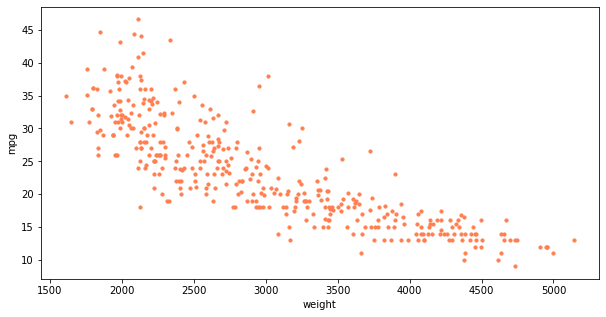

In [28]:
#3개의 후보중 단순회귀 분석에 사용할 독립 변수를 선택한다.
#종속변수(Y)와 독립변수(X)간의 일대일 관계를 찾는 것이므로 두 변수 간에 선형 관계가 있는지 그래프를 그려서 확인한다.

#종속변수 Y인 "연비 mpg" 와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
#Matplotlib 으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()


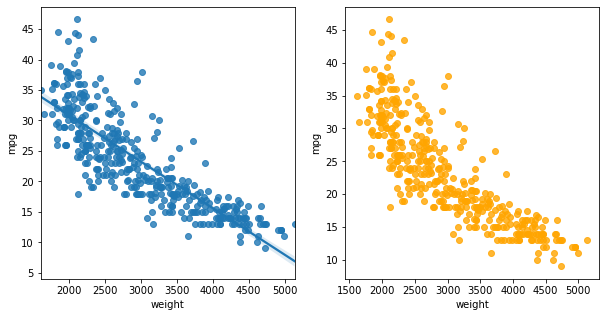

In [32]:
#seaborn 라이브러리의 regplot() 함수를 이용하여 두 변수에 대한 산점도를 그린다.
#기본적으로 회귀선을 표시한다, 제거하려면 fit_reg=False 옵션을 적용
#seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1) #회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False, color = 'orange')
plt.show()
plt.close()

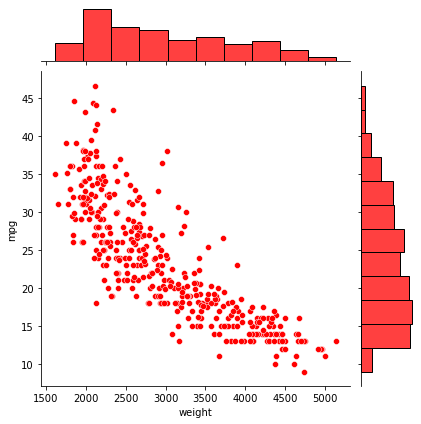

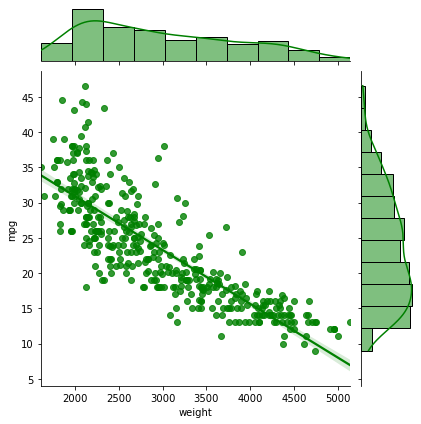

In [35]:
#산점도를 그릴 때 seaborn 라이브러리의 jointplot() 함수를 이용할 수도 있다.

#seaborn 조인트 그래프- 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf,color='red') #회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf, color='green') #kind='reg'를 이용하면 회귀선을 표시한다
plt.show()
plt.close()

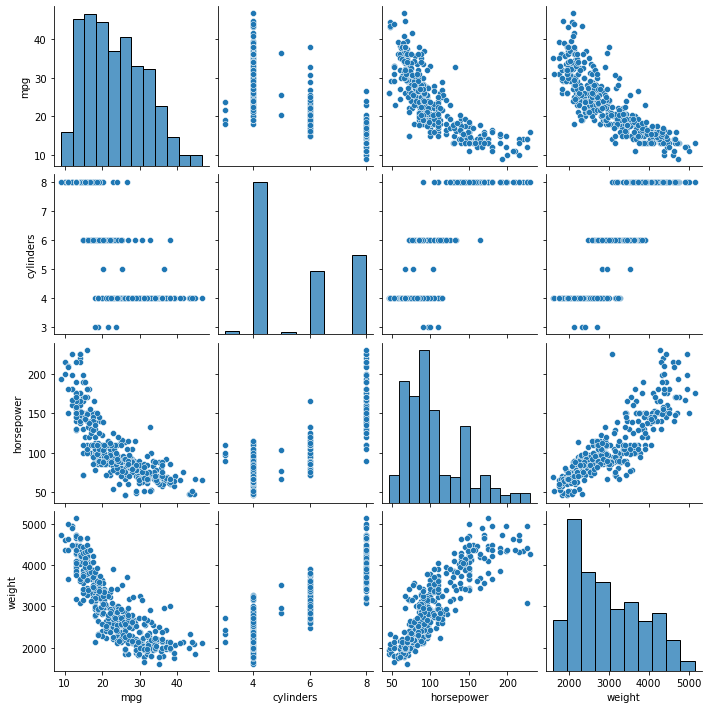

In [36]:
#seaborn pairplot 으로 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [39]:
'''
Step4 데이터셋 구분- 훈련용(train data)/ 검증용(test data)
'''

#속성(변수) 선택
X=ndf[['weight']] #독립 변수 X
Y=ndf['mpg']      #종속 변수 Y

#train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, #독립변수
                                                   Y,  #종속변수
                                                   test_size=0.3, #검증 30%
                                                   random_state=10) #랜덤 추출값
print('train data 개수: ',len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [40]:
'''
Step.5 단순회귀분석 모형 만들기 sklearn 사용
'''

#sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

#단순회귀분석 모형 객체 생성
lr = LinearRegression()

#train data를 가지고 모형 학습
lr.fit(X_train, y_train)

#학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [41]:
#회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

#회귀식의 y절편
print('y절편 b', lr.intercept_)

기울기 a:  [-0.00775343]


y절편 b 46.7103662572801


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


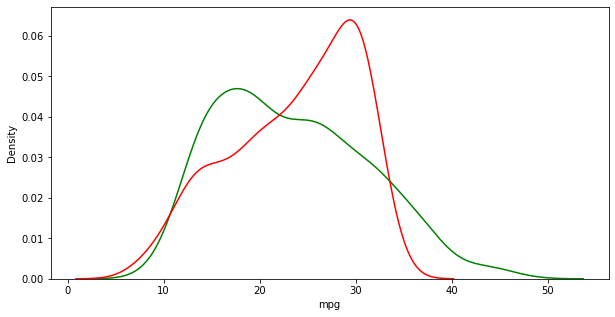

In [46]:
#모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y' , color='green')
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1, color='red')
plt.show()
plt.close()

In [53]:
#단순회귀분석은 두 변수 간의 관계를 직선 형태로 설명하는 알고리즘이다.
#직선보다 곡선으로 설명하는 것이 적합할 때는 다항 함수를 사용하면 보다 복잡한곡선 형태의 회귀선을 표현할 수 있다.
#다항회귀분석 Polynomial Regression 은 2차함수 이상의 다항 함수를 이용하여 두 변수간의 선형 관계를 설명하는 알고리즘이다.
#단순회귀분석의 Step1~4까지의 과정을 다시 정리

# -*- coding: utf-8 -*-

#기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
Step 1~4 데이터 준비
'''

#CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

#열 이름 저장
df.columns = ['mpg', 'cylinders', 'displaycement','horsepower','weight',
             'acceleration', 'model year', 'origin', 'name']

#horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True) #'?' 을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) #누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') #문자열을 실수형으로 변환

#분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

#ndf 데이터를 train data와 test data로 구분(7:3 비율)
X=ndf[['weight']] #독립변수 X
y=ndf['mpg'] #종속변수 Y

#train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


In [57]:
'''
Step.5 비선형 회귀분석 모형- sklearn 사용
'''

#sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures #다항식 변환

#다항식 변환
poly = PolynomialFeatures(degree=2)   #2차항 적용
X_train_poly = poly.fit_transform(X_train) #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [59]:
#train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

#학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.708700926297548


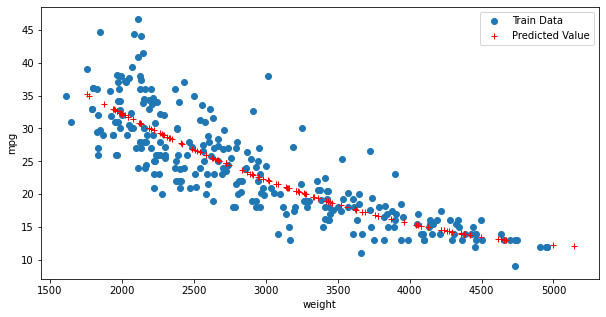

In [60]:
#예제 7-2 다항 회귀분석
#train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')         #데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


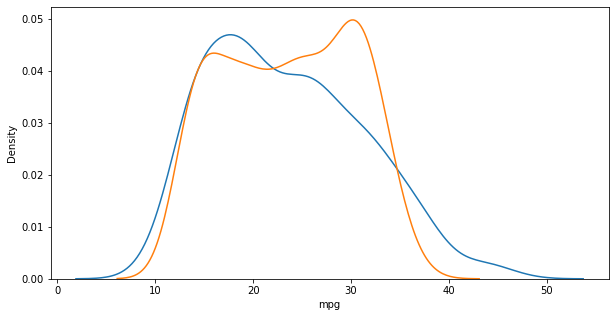

In [62]:
#모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat",ax=ax1)